# COVID-19 BL

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm

In [2]:
df = pd.read_csv('./Opendata-formato-csv/17-03-2020.csv')
df.tail()

,DATA,ISOLAMENTO DOMICILIARE,NUOVI IN ISOLAMENTO,OSPEDALIZZATI,TOTALE DIMESSI GUARITI,TERAPIA INTENSIVA,DECESSI,TOTALI POSITIVI,NUOVI POSITIVI,TOTALE CASI
12,2020-03-13 16:00:00,392,47,16,2,0,0,66,14,68
13,2020-03-14 17:00:00,453,61,21,2,1,1,78,12,81
14,2020-03-15 16:00:00,513,60,26,2,2,2,82,4,86
15,2020-03-16 17:00:00,569,56,23,3,4,2,106,24,111
16,2020-03-17 17:00:00,616,47,29,3,4,4,116,10,123


Text(0, 0.5, '')

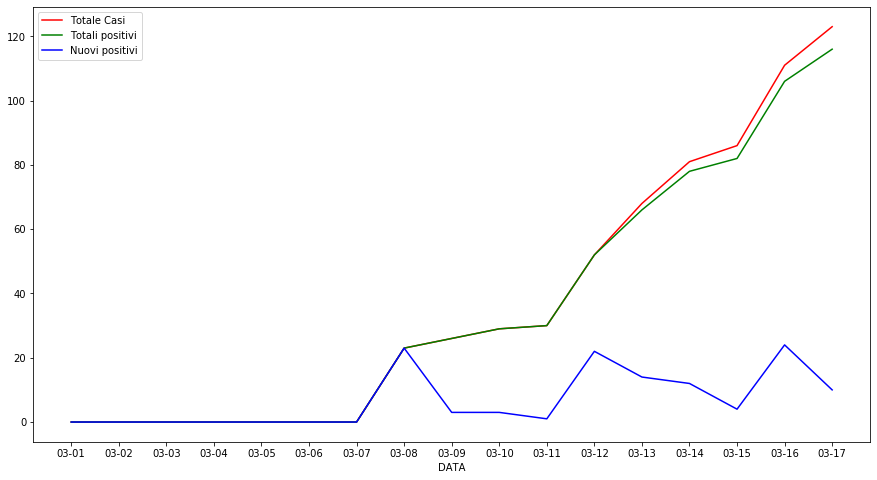

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(15,8)

sns.lineplot(df.DATA.apply(lambda x: x[5:10]), df['TOTALE CASI'], color='red', label='Totale Casi')
sns.lineplot(df.DATA.apply(lambda x: x[5:10]), df['TOTALI POSITIVI'], color='green', label='Totali positivi')
sns.lineplot(df.DATA.apply(lambda x: x[5:10]), df['NUOVI POSITIVI'], color='blue', label='Nuovi positivi')

ax.legend()
ax.set_ylabel('')
#sns.lineplot(df.DATA.apply(lambda x: x[5:10]), df['TOTALE CASI'], color='red')

Text(0, 0.5, 'log(totale_casi)')

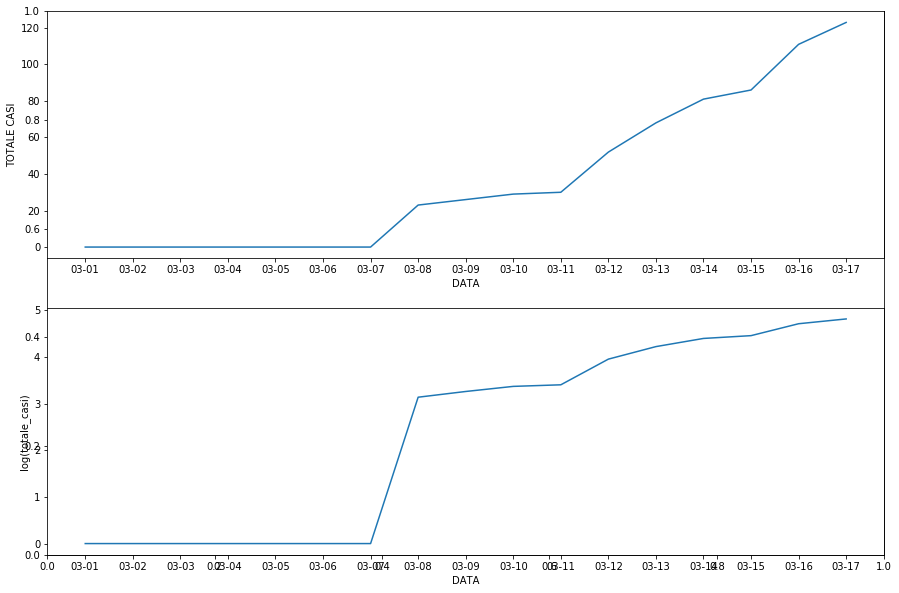

In [24]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
fig.set_size_inches(15,10)

sns.lineplot(df.DATA.apply(lambda x: x[5:10]), df['TOTALE CASI'], ax=ax1)
sns.lineplot(df.DATA.apply(lambda x: x[5:10]), df['TOTALE CASI'].apply(lambda x: math.log(x) if x != 0 else 0), ax=ax2)

ax2.set_ylabel('log(totale_casi)')

The first 7 days without cases are modifying our data, let's try to remove them.

In [5]:
df_f = df.iloc[7:,:]

Text(0, 0.5, 'log(totale_casi)')

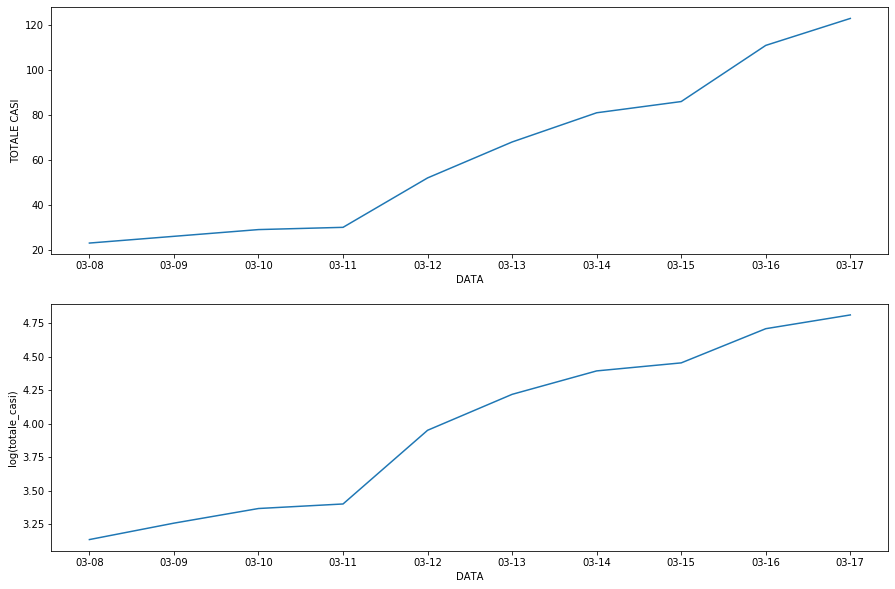

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
fig.set_size_inches(15,10)

sns.lineplot(df_f.DATA.apply(lambda x: x[5:10]), df_f['TOTALE CASI'], ax=ax1)
sns.lineplot(df_f.DATA.apply(lambda x: x[5:10]), df_f['TOTALE CASI'].apply(lambda x: math.log(x)), ax=ax2)

ax2.set_ylabel('log(totale_casi)')

Better, on this data we can try to fit our model

In [8]:
df_f.index = pd.to_datetime(df_f.DATA)
df_f['data_n'] = df_f.index.to_julian_date()

df_f['data_n'] = df_f.data_n - df_f.iloc[0, -1]
df_f['log_casi'] = df_f['TOTALE CASI'].apply(lambda x: math.log(x))

In [9]:
df_f

,DATA,ISOLAMENTO DOMICILIARE,NUOVI IN ISOLAMENTO,OSPEDALIZZATI,TOTALE DIMESSI GUARITI,TERAPIA INTENSIVA,DECESSI,TOTALI POSITIVI,NUOVI POSITIVI,TOTALE CASI,data_n,log_casi
DATA,,,,,,,,,,,,
2020-03-08 16:00:00,2020-03-08 16:00:00,134,40,6,0,0,0,23,23,23,0.000000,3.135494
2020-03-09 16:00:00,2020-03-09 16:00:00,169,35,10,0,0,0,26,3,26,1.000000,3.258097
2020-03-10 17:00:00,2020-03-10 17:00:00,235,66,9,0,0,0,29,3,29,2.041667,3.367296
2020-03-11 17:00:00,2020-03-11 17:00:00,292,57,9,0,0,0,30,1,30,3.041667,3.401197
2020-03-12 16:00:00,2020-03-12 16:00:00,345,53,11,0,0,0,52,22,52,4.000000,3.951244
2020-03-13 16:00:00,2020-03-13 16:00:00,392,47,16,2,0,0,66,14,68,5.000000,4.219508
2020-03-14 17:00:00,2020-03-14 17:00:00,453,61,21,2,1,1,78,12,81,6.041667,4.394449
2020-03-15 16:00:00,2020-03-15 16:00:00,513,60,26,2,2,2,82,4,86,7.000000,4.454347
2020-03-16 17:00:00,2020-03-16 17:00:00,569,56,23,3,4,2,106,24,111,8.041667,4.709530


In [10]:
X = df_f.data_n
X = sm.add_constant(X)
y = df_f.log_casi

model = sm.OLS(y, X).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.957   
Dependent Variable: log_casi         AIC:                -10.3488
Date:               2020-03-18 14:36 BIC:                -9.7437 
No. Observations:   10               Log-Likelihood:     7.1744  
Df Model:           1                F-statistic:        199.9   
Df Residuals:       8                Prob (F-statistic): 6.09e-07
R-squared:          0.962            Scale:              0.017429
-------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const        3.0439     0.0777   39.1772   0.0000   2.8647   3.2230
data_n       0.2049     0.0145   14.1387   0.0000   0.1715   0.2384
-----------------------------------------------------------------
Omnibus:               3.065        Durbin-Watson:          1.494
Prob(Omnibus):         0.216        Jarque-Bera (JB):       1.205
Skew:                  -0.850       Prob(JB):               0.548
Kurtosis:              3.060        Condition No.:          10   
=================================================================

"""

In [11]:
X_fit = df_f.data_n
X_fit = sm.add_constant(X_fit)

predict_frame = model.get_prediction(X_fit)
predict_frame = predict_frame.summary_frame()

log_predicted, log_predicted_lower, log_predicted_upper = np.array(predict_frame['mean']), np.array(predict_frame.mean_ci_lower), np.array(predict_frame.mean_ci_upper)

exper = lambda t: math.exp(t)
vfunc = np.vectorize(exper)
predicted, predicted_lower, predicted_upper = vfunc(log_predicted), vfunc(log_predicted_lower), vfunc(log_predicted_upper)

Text(0, 0.5, 'log_casi')

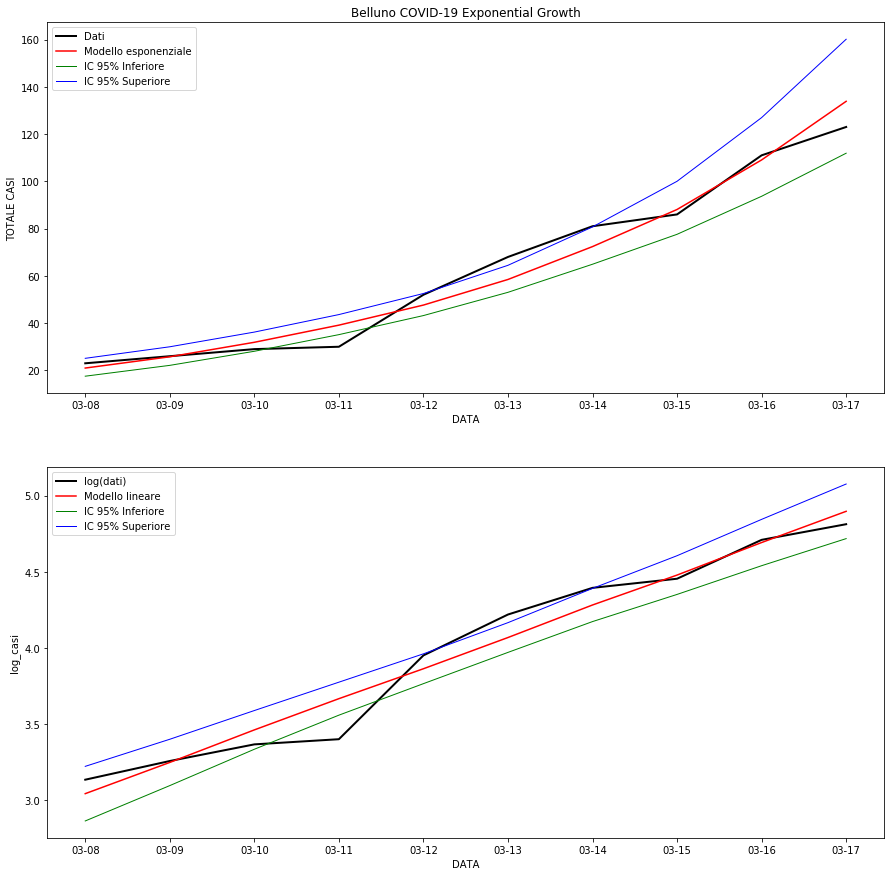

In [15]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
fig.set_size_inches(15,15)

ax1.set_title('Belluno COVID-19 Exponential Growth')

# exponential
sns.lineplot(x=df_f.DATA.apply(lambda x: x[5:10]), y=df_f['TOTALE CASI'], color='black', ax=ax1, label='Dati', lw=2)
sns.lineplot(x=df_f.DATA.apply(lambda x: x[5:10]), y=predicted, color='red', ax=ax1, label='Modello esponenziale')
# CI
sns.lineplot(x=df_f.DATA.apply(lambda x: x[5:10]),y=predicted_lower, color='green', ax=ax1, label='IC 95% Inferiore', lw=1)
sns.lineplot(x=df_f.DATA.apply(lambda x: x[5:10]),y=predicted_upper, color='blue', ax=ax1, label='IC 95% Superiore', lw=1)

# log
sns.lineplot(x=df_f.DATA.apply(lambda x: x[5:10]), y=df_f.log_casi, color='black', ax=ax2, label='log(dati)', lw=2)
sns.lineplot(x=df_f.DATA.apply(lambda x: x[5:10]),y=log_predicted, color='red', ax=ax2, label='Modello lineare')
# CI
sns.lineplot(x=df_f.DATA.apply(lambda x: x[5:10]),y=log_predicted_lower, color='green', ax=ax2, label='IC 95% Inferiore', lw=1)
sns.lineplot(x=df_f.DATA.apply(lambda x: x[5:10]),y=log_predicted_upper, color='blue', ax=ax2, label='IC 95% Superiore', lw=1)
ax2.set_ylabel('log_casi')

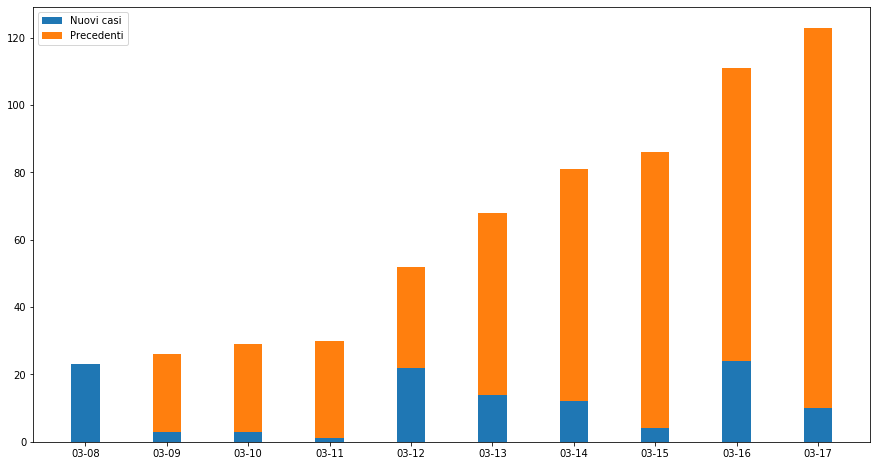

In [22]:
labels = df_f.DATA.apply(lambda x: x[5:10])
new_infected = df_f['NUOVI POSITIVI']
old_infected = df_f['TOTALE CASI'] - df_f['NUOVI POSITIVI']

fig, ax = plt.subplots()
fig.set_size_inches(15,8)

ax.bar(labels, new_infected, .35, label='Nuovi casi')
ax.bar(labels, old_infected, .35, bottom=new_infected, label='Precedenti')

ax.legend()